In [193]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

This week we are going to concentrate on asking a statistical question. This process almost always consists of 3+ steps:

 Writing down in words very precisely what question you are trying to ask.
 Translating the precise english question into a mathematical expression. This often includes determining the pdf of the background (possibly including trials), and the to integral to do to obtain a probability.
 Coverting the probability into equivalent sigma

So in this lab we will assume that we know the form of the signal-free background distribution (determining a distribution from data will be next week's lab). In each of our three examples, your task will be to state the statistical question, convert it to math, then perform the associated analyses.


# PROBLEM 1

In our first example we are looking at the temperature reading (meta-data) associated with an experiment. For the experiment to work reliably, the temperature should be at around 12 Kelvin, and if we look at the data it is mostly consistent with 12 Kelvin to within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, there are times when the thermal control system misbehaved and the temperature was not near 12 K, and in addition there are various glitches in the thermometry that give anomalously high and low readings (the reading does not match the real temperature). We definitely want to identify and throw out all the data when the thermal control system was not working (and the temperature was truly off from nominal). While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.

### A) So our goal is to identify bad data and throw it out.

#### 1) Start by exploring the data you have created with appropriate plots


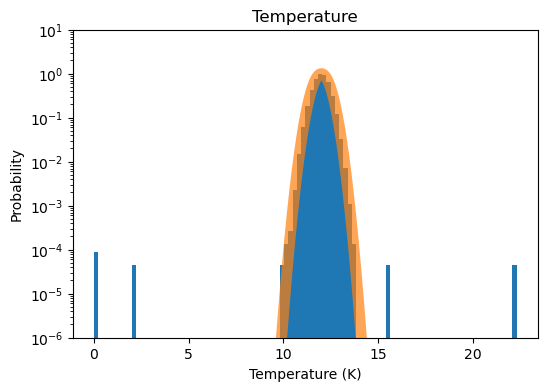

In [191]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

fig, ax = plt.subplots(1, 1, figsize = (6,4))
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 10)
ax.set_yscale('log')
ax.set_ylim(10e-7,10)

x = np.linspace(9.5,14.5,10000)
ax.plot(x,stats.norm.pdf(x,loc = 12., scale = 0.4),linewidth = 8,alpha = 0.7)
ax.set_title('Temperature')
ax.set_ylabel('Probability')
ax.set_xlabel('Temperature (K)')

plt.show()

#### 2) State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.

How do we define "bad data points" and how do we effectively remove them from our data set without removing "good data points"?


#### 3) Restate your question in math. Be very clear.

What deviation from the expected value do we determine to be acceptable? What is the 

#### 4) Apply your statistical test and construct a truth table

In [230]:
mean = 12
std = 0.4
bad_data = []
good_data = []
ex_factor = 4
n = ex_factor *std

for i in d:
    if abs(i - mean) > n:
        bad_data.append(i)
    else:
        good_data.append(i)

        
BTTG = 1
TTTG = np.size(good_data) - BTTG

BTTB = 9
TTTB = np.size(bad_data) - BTTB
    
data = {'True T': [TTTG,TTTB],
        'Bad T': [BTTG,BTTB]}

df = pd.DataFrame(data, index=['Your Test Good','Your Test Bad'])

print (df)

                True T  Bad T
Your Test Good   99992      1
Your Test Bad        6      9


#### B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

A more narrow statistical threshold will omit more of the "good data" in an attempt to exclude all of the "bad data." You can use the probabilty associated with the use of standard deviation in order to predict an expected approximate amount. In a random collection of data such as this one, it cannot be calculated, but can be estimated.

#### C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

Yes, the value 12.7 was included in the final true temperature data set. This is due to its proximity to the expected value. This one could not be removed unless a threshold of less than 2 deviations was used, which would eliminate a far greater amount of "good data." Removing this point may likely reduce the accuracy of your distribution from a massive reduction of data points and is better left in.

# PROBLEM 2

### In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:

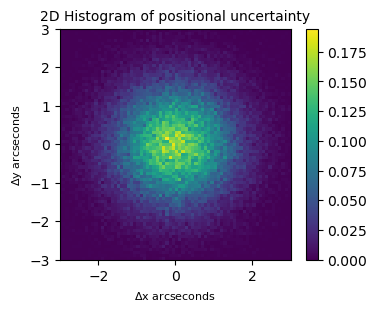

In [84]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 10)
plt.ylabel("$\Delta$y arcseconds", fontsize = 8)
plt.xlabel("$\Delta$x arcseconds", fontsize = 8)
plt.colorbar(h[3], ax=ax)

plt.show()

### If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?

#### 1) What is the question in words?

In this case, stars can be considered stationary. A signal from an asteroid moving through space will be indicated by true movement between images. The task is to determine significant movement within background noise associated with taking measurements. 

#### 2) What is the question in math? [Hint: Come up with an analytic description of your pdf(). The Blue Book may be helpful here.]

How can I reduce this data to a function of which i can integrate and determine the significance of data points?

#### 3)What distance in arcseconds represents a 5 sigma detection of motion?

Calculating the distance from the center with (x**2 + y**2)**0.5, this can produce a distrobution of background noise from which magnitude of movement can be evaulated.

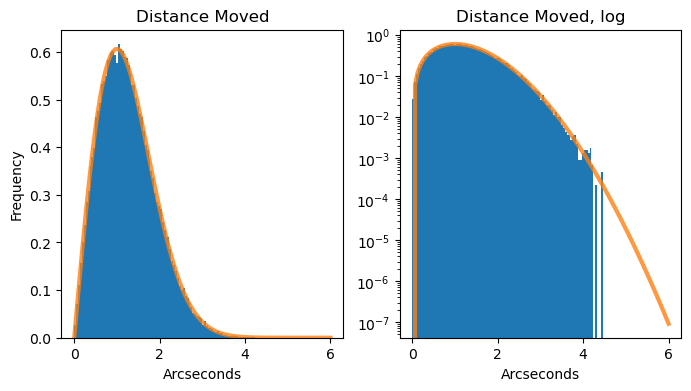

In [85]:
fig, ax = plt.subplots(nrows=1,ncols = 2,figsize = (8,4))

x = a[(0)]
y = a[(1)]
r = (x**2+y**2)**0.5
i= np.linspace(0,6,100)
nl = stats.rayleigh.pdf(i,loc = 0, scale = 1)

ax[0].hist(r,100, density = True)
ax[0].plot(i,nl, label = 'Rayleigh', lw = 3, alpha = 0.8)
ax[0].set_xlabel('Arcseconds')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distance Moved')

ax[1].hist(r,100, density = True)
ax[1].plot(i,nl, label = 'Rayleigh', lw = 3, alpha = 0.8)
ax[1].set_yscale('log')
ax[1].set_xlabel('Arcseconds')
ax[1].set_title('Distance Moved, log')

plt.show()

In [89]:
prob5sig = 1/3.5e6
det1 = stats.rayleigh.ppf(1-(1/3.5e6), loc = 0, scale = 1)
print('Signal Strength Required for 5-Sigma is '+str(det1) +' Arcseconds')

Signal Strength Required for 5-Sigma is 5.489676406965609 Arcseconds


# PROBLEM 3

#### As we discussed in class, one of the key backgrounds for gamma-ray telescopes are cosmic rays. Cosmic rays are charged particles—usually protons or electrons but can include atomic nuclei such a alpha particles (helium) or iron. Because of their charge cosmic rays spiral in the magnetic field of the galaxy. From the perspective of the Earth they appear to be coming uniformly from all directions like a high energy gas, and the direction the cosmic ray is travelling when it reaches the Earth tells us nothing about where it came from because we don't know what tortured path it has taken through the galaxy to reach us. However, at trillion electron volt energies and above, the spiral loops are fairly big and the sun and the moon will block cosmic rays. This means the sun and the moon appear as holes in the cosmic ray sky (cosmic rays from that direction are absorbed).

#### Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?

### 1) What is the question in words?

If we have an expected value per minute, what is the significance of the measured value from that same area after oberving for 15 days?

### 2) Translate the question to math, describing both the expected background pdf() and the integral you need to do.

Expected background is a Poisson Distrobution about 7200 when the xscale is the total number of recorded cosmic rays.
The integral will evaluate the area under the Poisson curve from our 6800 value to zero. Integrating this direction will produce a negative value, thus the magnitude of this value is the significance.

## 3) Convert to sigma

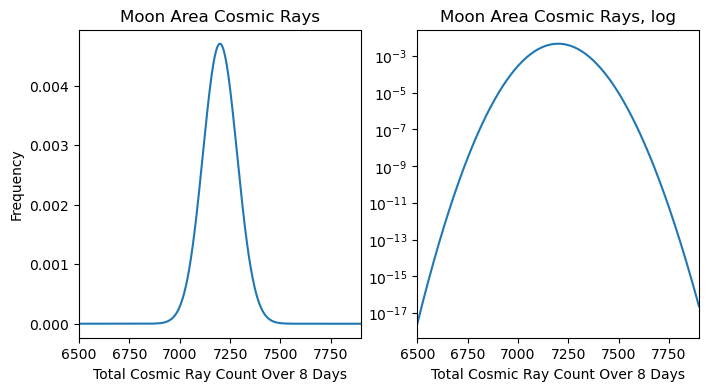

The probability of measuring 6800 Cosmic Rays is 5.850956323100652e-08
The significance of this measurement is 5.298091812839428


In [148]:
fig, ax = plt.subplots(nrows=1,ncols = 2,figsize = (8,4))

q = range(6500,7900)
m = stats.poisson.pmf(q,mu = 7200)
ax[0].plot(q,m)
ax[0].set_title('Moon Area Cosmic Rays')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Total Cosmic Ray Count Over 8 Days')
ax[0].set_xlim(6500,7900)

ax[1].plot(q,m)
ax[1].set_title('Moon Area Cosmic Rays, log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Total Cosmic Ray Count Over 8 Days')
ax[1].set_xlim(6500,7900)
ax[1].set_xlim(6500,7900)



plt.show()

prob = stats.poisson.pmf(6800, mu = 7200)
sigma = -stats.norm.ppf(prob)

print('The probability of measuring 6800 Cosmic Rays is ' + str(prob))
print('The significance of this measurement is ' + str(sigma))